In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [5]:
df.duplicated().sum()

763

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Checking Data types

In [7]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [8]:
df.shape

(3577, 8)

In [10]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [12]:
df = df[(df['selling_price'] > 0) & (df['km_driven'] > 0)]
print(df.describe())

              year  selling_price      km_driven
count  3577.000000   3.577000e+03    3577.000000
mean   2012.962538   4.739125e+05   69250.545709
std       4.251759   5.093018e+05   47579.940016
min    1992.000000   2.000000e+04       1.000000
25%    2010.000000   2.000000e+05   36000.000000
50%    2013.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [ ]:
print('Year : ',df.year.unique(),'\n')
print('fuel :', df.fuel.unique(), '\n')
print('Transmission : ', df.transmission.unique(), '\n')
print('seller Type: :', df.seller_type.unique(),'\n')
print('Owner :', df.owner.unique(), '\n')

Year :  [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992] 

fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric'] 

Transmission :  ['Manual' 'Automatic'] 

seller Type: : ['Individual' 'Dealer' 'Trustmark Dealer'] 

Owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car'] 



In [13]:
df['brand']=df['name'].str.split(expand=True)[0]

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [16]:
df['fuel_type'] = lb.fit_transform(df['fuel'])
df['Type_of_Seller'] = lb.fit_transform(df['seller_type'])
df['Transmit'] = lb.fit_transform(df['transmission'])
df['Owner_Type'] = lb.fit_transform(df['owner'])
df['brand_name'] = lb.fit_transform(df['brand'])

In [17]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,4,1,1,0,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,4,1,1,0,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,1,1,1,0,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,4,1,1,0,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,1,1,1,2,9


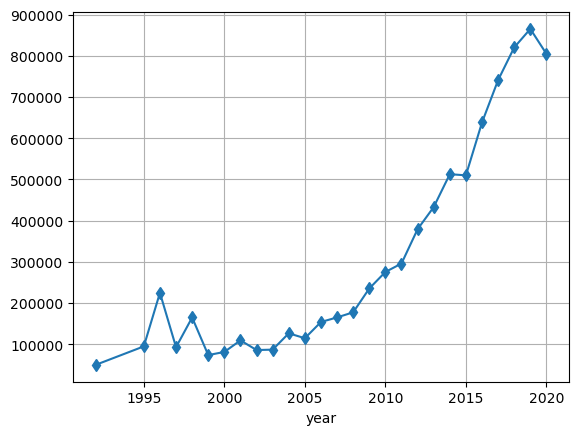

In [ ]:
r1=df.groupby('year')['selling_price'].mean()
r1.plot(kind='line',marker='d')
plt.grid()
plt.show()

In [ ]:
r2=df.groupby('brand')['selling_price'].mean()

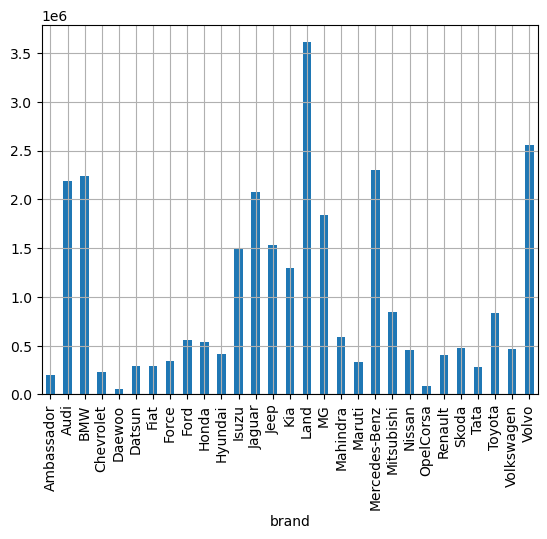

In [ ]:
r2.plot(kind='bar')
plt.grid()
plt.show()

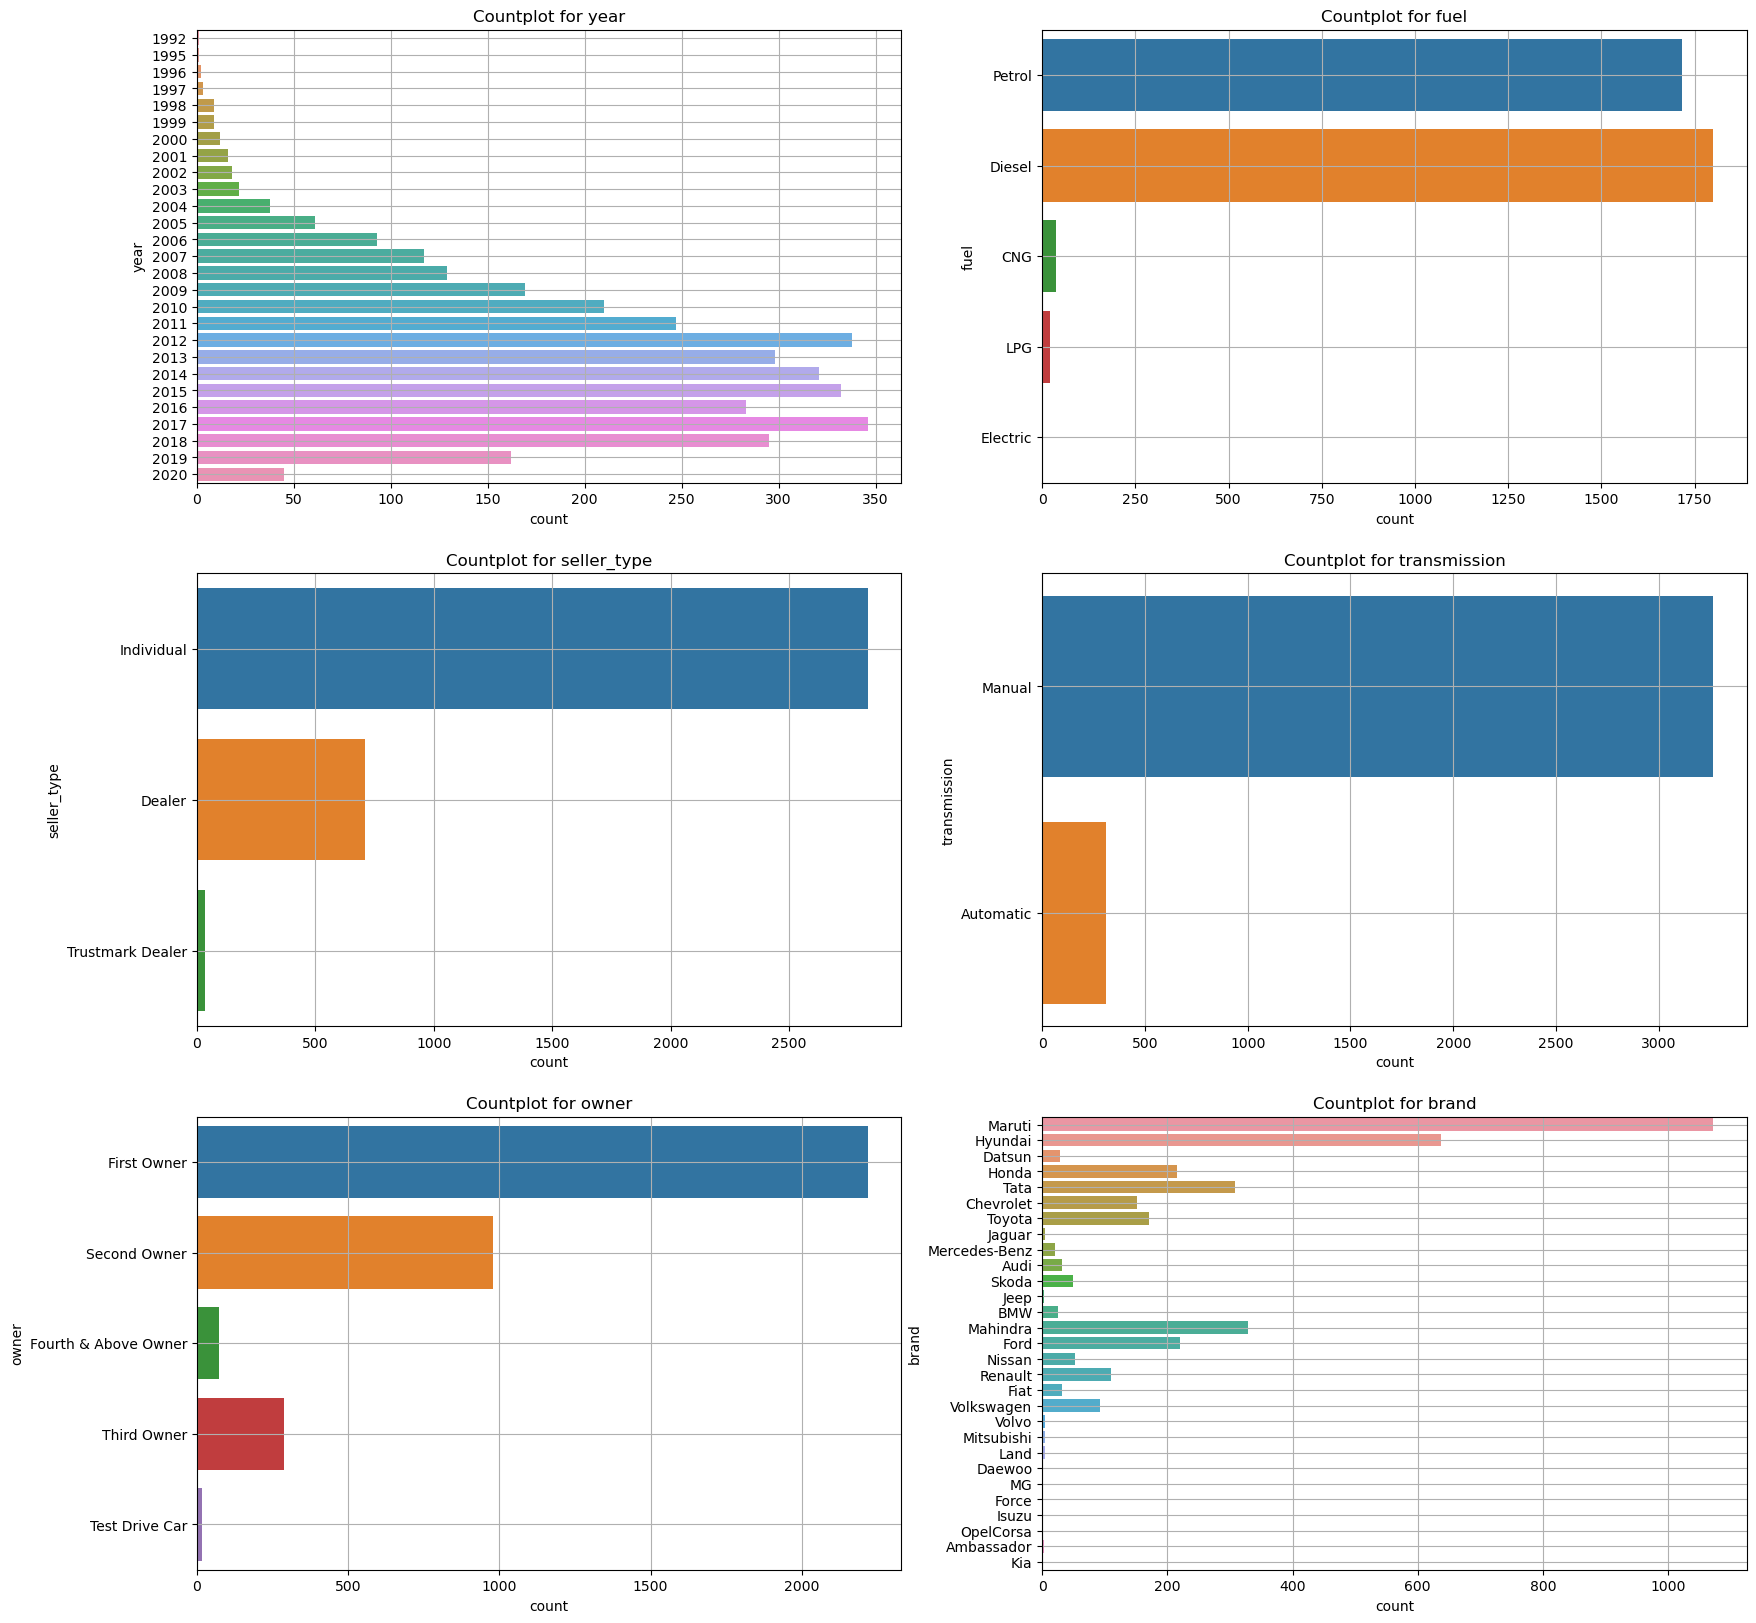

In [ ]:
cols = ['year','fuel', 'seller_type',
       'transmission', 'owner', 'brand']

plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
    plt.grid()

plt.show()

In [18]:
d1 = df.groupby(df['fuel'])['selling_price'].mean()
d1

,selling_price
fuel,
CNG,273162.081081
Diesel,614001.075000
Electric,310000.000000
LPG,171818.136364
Petrol,335344.340128


In [19]:
df['selling_price'].mean()

473912.54207436397

In [20]:
d2 = d1.isin(d1 > df['selling_price'].mean())
d2

,selling_price
fuel,
CNG,False
Diesel,False
Electric,False
LPG,False
Petrol,False


In [21]:
d3 = df.groupby(df['seller_type'])['selling_price'].mean()
d3

,selling_price
seller_type,
Dealer,652699.390449
Individual,424904.024364
Trustmark Dealer,822272.727273


In [22]:
d4 = d1.isin(d3>df['selling_price'].mean())
d4

,selling_price
fuel,
CNG,False
Diesel,False
Electric,False
LPG,False
Petrol,False


In [23]:
c1 = df.groupby(df['transmission'])['selling_price'].mean()
c1

,selling_price
transmission,
Automatic,1.274955e+06
Manual,3.973657e+05


In [24]:
c4=c1.isin(c1>df['selling_price'].mean())
c4

,selling_price
transmission,
Automatic,False
Manual,False


In [25]:
data = df.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand'], axis=1)
data.head()

,year,selling_price,km_driven,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name
0,2007,60000,70000,4,1,1,0,18
1,2007,135000,50000,4,1,1,0,18
2,2012,600000,100000,1,1,1,0,10
3,2017,250000,46000,4,1,1,0,5
4,2014,450000,141000,1,1,1,2,9


In [28]:
data.dtypes

,0
year,int64
selling_price,int64
km_driven,int64
fuel_type,int64
Type_of_Seller,int64
Transmit,int64
Owner_Type,int64
brand_name,int64


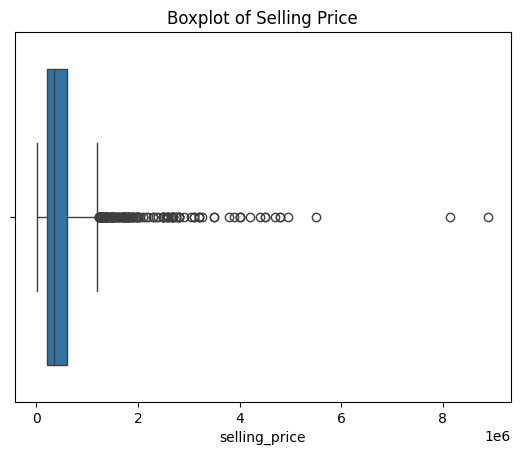

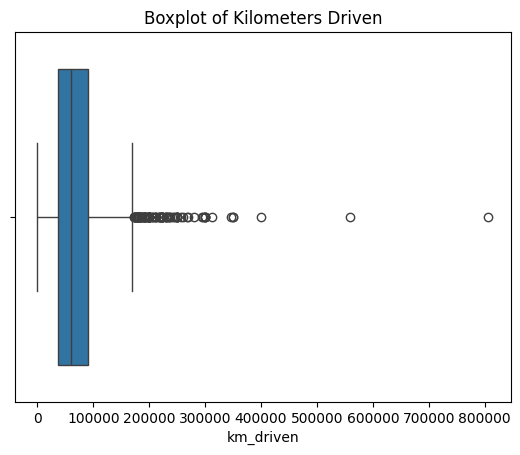

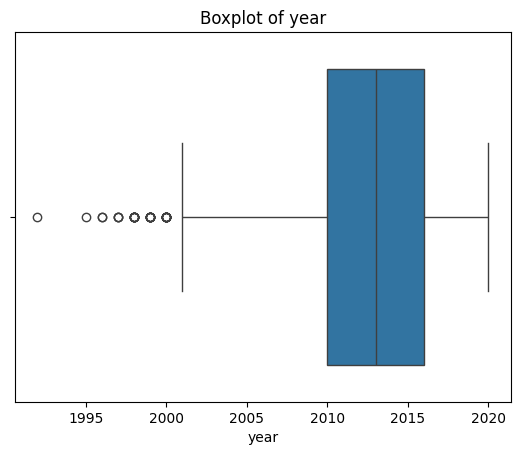

In [29]:
sns.boxplot(x=data['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

sns.boxplot(x=data['km_driven'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

sns.boxplot(x=data['year'])
plt.title('Boxplot of year')

plt.show()

In [30]:
def treatment_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [31]:
for i in num_cols:
    data = treatment_outliers(data, i)

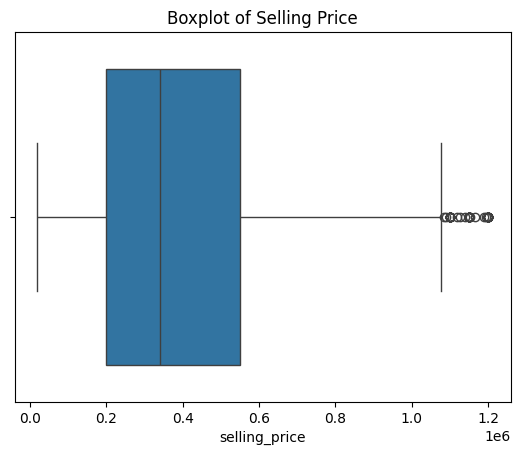

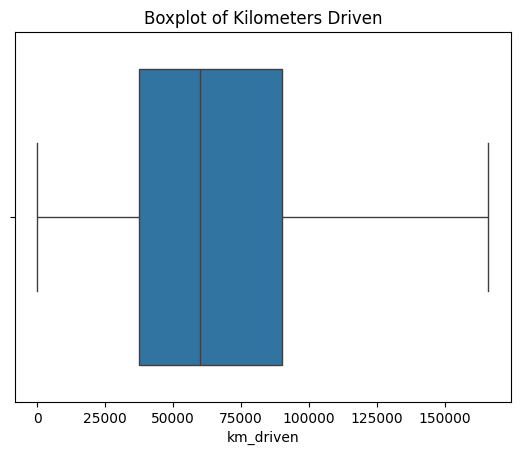

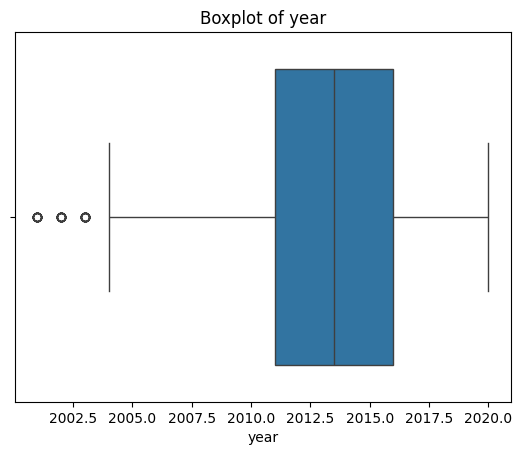

In [32]:
sns.boxplot(x=data['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

sns.boxplot(x=data['km_driven'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

sns.boxplot(x=data['year'])
plt.title('Boxplot of year')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = data.drop(columns=['selling_price'])
y = data['selling_price']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2600, 7)
(2600,)
(650, 7)
(650,)


In [36]:
from sklearn.metrics import *

In [37]:
def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'MAE':mae,
                       'MSE':mse,'RMSE':rmse},index=[mname])
    return res,ypred

In [38]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from xgboost import XGBRegressor

In [39]:
lr = LinearRegression()
lr_res,ypred_lr = eval_model(lr,'LinReg')
dt = DecisionTreeRegressor(max_depth=6,min_samples_split=8)
dt_res,ypred_dt = eval_model(dt,'DT_Reg')
knn = KNeighborsRegressor(n_neighbors=11)
knn_res,ypred_knn = eval_model(knn,'KNN_Reg')
rf = RandomForestRegressor(n_estimators=80,max_depth=6,min_samples_split=8)
rf_res,ypred_rf = eval_model(rf,'RF_Reg')
ls = Lasso()
ls_res,y_pred_rg = eval_model(ls,'Lasso_reg')
rg = Ridge()
rg_res,y_pred_rg = eval_model(rg,'Ridge_reg')


In [40]:
all_res  = pd.concat([lr_res,dt_res,knn_res,rf_res,rg_res,ls_res])
all_res

,Train_R2,Test_R2,MAE,MSE,RMSE
LinReg,0.516164,0.526327,132811.516869,3.140107e+10,177203.464572
DT_Reg,0.652598,0.619313,118135.586591,2.523676e+10,158860.809429
KNN_Reg,0.420458,0.367958,155090.696364,4.189977e+10,204694.323492
RF_Reg,0.681456,0.654426,111630.817863,2.290899e+10,151357.159495
Ridge_reg,0.516162,0.526287,132811.545030,3.140368e+10,177210.842150
Lasso_reg,0.516164,0.526326,132811.507410,3.140110e+10,177203.566949


In [41]:
import pickle
import joblib

In [43]:
pickle.dump(rf,open('Best_Model.pkl','wb'))

In [44]:
load_model=joblib.load('Best_Model.pkl')

In [45]:
random_indices = np.random.choice(data.index, size= 20, replace=False)
sample_data_20 = data.loc[random_indices]
sample_data_20

,year,selling_price,km_driven,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name
1533,2014,530000,50000,4,1,1,0,9
106,2017,628000,120000,1,1,1,0,17
1137,2013,425000,72000,1,1,1,0,8
1528,2014,220000,66000,4,0,1,0,18
833,2010,275000,70000,4,1,1,0,8
1924,2012,185000,40000,1,1,1,0,25
446,2006,65000,124439,4,1,1,2,18
1427,2006,160000,140000,4,1,1,2,26
2844,2013,490000,40000,1,1,1,0,18
1621,2016,640000,72787,1,2,1,0,18


In [46]:
sample_data=sample_data_20.drop('selling_price', axis=1)

In [47]:
Sample_pred = load_model.predict(sample_data)
Sample_pred

array([355417.13470132, 670187.27010016, 367770.49753898, 320135.36739504,
       198255.69258717, 295094.57096988, 109586.64358758, 346614.72522689,
       386478.97810256, 598836.57238085, 398486.80053796, 490413.22557   ,
       131921.50832814, 598679.17675619, 195598.56532813, 395722.68830463,
       670435.22408926, 135588.83767206, 136946.60416598, 240438.97045902])

In [48]:
Prediction_sample = pd.DataFrame(Sample_pred)
Prediction_sample


,0
0,355417.134701
1,670187.270100
2,367770.497539
3,320135.367395
4,198255.692587
5,295094.570970
6,109586.643588
7,346614.725227
8,386478.978103
9,598836.572381


In [49]:
print(sample_data_20[['selling_price', 'year']])

      selling_price  year
1533         530000  2014
106          628000  2017
1137         425000  2013
1528         220000  2014
833          275000  2010
1924         185000  2012
446           65000  2006
1427         160000  2006
2844         490000  2013
1621         640000  2016
3093         425000  2013
3614         540000  2014
359          100000  2007
3819         425000  2016
4153          90000  2002
2356         500000  2013
490          900000  2018
868          150000  2008
2549         190000  2008
495          250000  2012


In [50]:
sample_data_20['pred_selling_price']=Prediction_sample.values
sample_data_20

,year,selling_price,km_driven,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name,pred_selling_price
1533,2014,530000,50000,4,1,1,0,9,355417.134701
106,2017,628000,120000,1,1,1,0,17,670187.270100
1137,2013,425000,72000,1,1,1,0,8,367770.497539
1528,2014,220000,66000,4,0,1,0,18,320135.367395
833,2010,275000,70000,4,1,1,0,8,198255.692587
1924,2012,185000,40000,1,1,1,0,25,295094.570970
446,2006,65000,124439,4,1,1,2,18,109586.643588
1427,2006,160000,140000,4,1,1,2,26,346614.725227
2844,2013,490000,40000,1,1,1,0,18,386478.978103
1621,2016,640000,72787,1,2,1,0,18,598836.572381


In [51]:
com = (sample_data_20[['selling_price', 'pred_selling_price']])
com.to_csv('sample_prediction.csv')
com

,selling_price,pred_selling_price
1533,530000,355417.134701
106,628000,670187.270100
1137,425000,367770.497539
1528,220000,320135.367395
833,275000,198255.692587
1924,185000,295094.570970
446,65000,109586.643588
1427,160000,346614.725227
2844,490000,386478.978103
1621,640000,598836.572381
